### Classify movie reviews (Binary Classification) with IMDB dataset

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
len(train_data)

25000

In [4]:
train_labels.shape

(25000,)

In [5]:
print(len(train_data[100]), len(train_data[250]))

158 231


#### train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [6]:
train_labels[10], train_labels[35]

(1, 0)

In [7]:
max([(max(sequence)) for sequence in train_data])

9999

#### Quickly decode reviews back to english words:

In [8]:
word_index = imdb.get_word_index()

In [9]:
len(word_index)

88584

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
len(reverse_word_index)

88584

In [12]:
len(train_data[0])

218

In [13]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [14]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
# train_data[0]
# reverse_word_index.get(16 - 3, '?')

### Preparing the data
To feed data into a neural network, we have to turn lists into tensors.
There are two ways to do that:
1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer).
2. One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.
#### Let’s go with the latter solution to vectorize the data,

In [16]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [17]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [19]:
len(x_train[0])

10000

In [20]:
print(train_labels.shape)
print(train_labels[1])

(25000,)
0


In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [23]:
y_train[1]

0.0

#### Note: The input data is vectors, and the labels are scalars (1 or 0). The network that performs well is a simple fully connected (Dense) layers with "Relu" activations.
### Build Model

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Note: Without the activation function, the dense layer consist of two linear operations (dot product, and addition). So the layer could only learn linear transformation of the input data (the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimentional space). This is too restricted and wouldn't benifit from multiple layers of representations.
Non-linear transformation gives the access to a much richer hypothesis space.
#### Model Compilation

In [26]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [28]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### Make a Validation Dataset

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training Model

In [30]:
model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=10, 
                    batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 15s 1ms/step - loss: 0.5100 - acc: 0.7615 - val_loss: 0.3535 - val_acc: 0.8646
Epoch 2/10
15000/15000 [==============================] - 11s 706us/step - loss: 0.2789 - acc: 0.8964 - val_loss: 0.3058 - val_acc: 0.8787
Epoch 3/10
15000/15000 [==============================] - 11s 707us/step - loss: 0.1999 - acc: 0.9281 - val_loss: 0.2904 - val_acc: 0.8839
Epoch 4/10
15000/15000 [==============================] - 11s 719us/step - loss: 0.1501 - acc: 0.9461 - val_loss: 0.2866 - val_acc: 0.8898
Epoch 5/10
15000/15000 [==============================] - 11s 707us/step - loss: 0.1136 - acc: 0.9610 - val_loss: 0.4553 - val_acc: 0.8441
Epoch 6/10
15000/15000 [==============================] - 11s 726us/step - loss: 0.0849 - acc: 0.9726 - val_loss: 0.3533 - val_acc: 0.8795
Epoch 7/10
15000/15000 [==============================] - 11s 713us/step - loss: 0.0654 - acc: 0.9792 - val_loss: 0.38

In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [32]:
history_dict['val_loss']

[0.3534904371261597,
 0.3058238628864288,
 0.2904304790496826,
 0.28655972809791563,
 0.4552711926460266,
 0.3533103630542755,
 0.38411748685836794,
 0.4099892790794373,
 0.882033344078064,
 0.4964864245891571]

### Plotting the training and validation loss

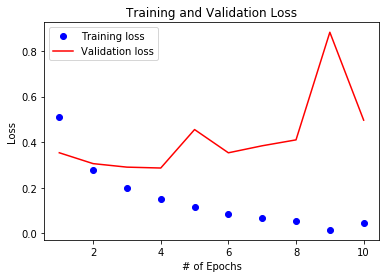

In [34]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo = blue dot
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the Training and Validation accuracy

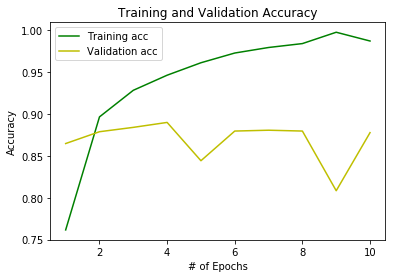

In [35]:
# plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'g', label = 'Training acc') # bo = blue dot
plt.plot(epochs, val_acc_values, 'y', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 13s 536us/step - loss: 0.1778 - acc: 0.9466
Epoch 2/4
25000/25000 [==============================] - 13s 532us/step - loss: 0.0992 - acc: 0.9678
Epoch 3/4
25000/25000 [==============================] - 14s 544us/step - loss: 0.0605 - acc: 0.9807
Epoch 4/4
25000/25000 [==============================] - 13s 532us/step - loss: 0.0378 - acc: 0.9890


In [37]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 6s 233us/step


In [38]:
results

[0.5239375107836723, 0.86832]

In [39]:
model.predict(x_test)

array([[0.00710375],
       [0.99999917],
       [0.9999285 ],
       ...,
       [0.24798605],
       [0.00998424],
       [0.94052   ]], dtype=float32)